<a href="https://colab.research.google.com/github/zaidsallam10/Computer_Vision/blob/main/LeNet_5_Pytorch_(CNN_Classic_Models).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
from datetime import datetime 
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import tqdm
# check device
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'


In [17]:
# Initializtion
num_epochs=15
batch_size=64
learning_rate=0.001
target=10
input_size=32
random_size = 42

# Datapreperation
trasform=transforms.Compose([transforms.Resize((32,32)),transforms.ToTensor()])
train_set=datasets.MNIST(root='mnist_dataset',train=True,transform=trasform,download=True)
test_set=datasets.MNIST(root='mnist_dataset',train=False,transform=trasform,download=True)

train_loader=DataLoader(dataset=train_set,shuffle=True,batch_size=batch_size)
test_loader=DataLoader(dataset=test_set,shuffle=True,batch_size=batch_size)

In [10]:
class LeNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.relu=nn.ReLU()
    self.avg_pool=nn.AvgPool2d(kernel_size=(2,2),stride=(2,2))
    self.conv1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=(5,5),padding=0,stride=(1,1))
    self.conv2=nn.Conv2d(in_channels=6,out_channels=16,stride=(1,1),kernel_size=(5,5),padding=0)
    self.conv3=nn.Conv2d(in_channels=16,out_channels=120,stride=(1,1),kernel_size=(5,5),padding=0)
    self.fn1=nn.Linear(120,84)
    self.fn2=nn.Linear(84,10)
  def forward(self,x):
    # print("x=",x.shape)
    x=self.relu(self.conv1(x))
    # print("x=",x.shape)
    x=self.avg_pool(x)
    # print("x=",x.shape)
    x=self.relu(self.conv2(x))
    # print("x=",x.shape)
    x=self.avg_pool(x)
    # print("x=",x.shape)
    x=self.relu(self.conv3(x))
    # print("x=",x.shape)
    x=x.reshape(x.shape[0],-1)
    x=self.relu(self.fn1(x))
    # print("x=",x.shape)
    x=self.fn2(x)
    # print("x=",x.shape)
    return x




# x=torch.rand((10,1,32,32))
# ss=LeNet()
# ss(x)

In [11]:
# optimizer & loss
model=LeNet()
optimizer=torch.optim.Adam(params=model.parameters(),lr=learning_rate)
criteration=nn.CrossEntropyLoss()

In [12]:
def plot_losses(train_losses, valid_losses):
    '''
    Function for plotting training and validation losses
    '''
    
    # temporarily change the style of the plots to seaborn 
    plt.style.use('seaborn')

    train_losses = np.array(train_losses) 
    valid_losses = np.array(valid_losses)

    fig, ax = plt.subplots(figsize = (8, 4.5))

    ax.plot(train_losses, color='blue', label='Training loss') 
    ax.plot(valid_losses, color='red', label='Validation loss')
    ax.set(title="Loss over epochs", 
            xlabel='Epoch',
            ylabel='Loss') 
    ax.legend()
    fig.show()


In [15]:
# Training
def train_model(model,epochs,optimizer,criteration,train_loader,test_loader,device):
  training_losses=[]
  testing_losses=[]
  for epoch in (range(epochs)):
    print('epoch=',epoch)
   
    training_running_loss=0
    test_running_loss=0
    # Training 
    model.train()
    for X,y_true in (train_loader):
        optimizer.zero_grad()
       
        y_hat = model(X)
        loss=criteration(y_hat,y_true)
        training_running_loss+=loss.item() * X.size(0)
        loss.backward()
        optimizer.step()
    training_losses.append(training_running_loss/len(train_loader.dataset))
    print("epoch {} training loss is = {}".format(epoch,(training_running_loss/len(train_loader.dataset))*100))


    # Testing 
    model.eval()
    for X,y_test in (test_loader):
      y_yat=model(X)
      loss=criteration(y_yat,y_test)
      test_running_loss+=loss.item() * X.size(0)
    testing_losses.append(test_running_loss/(len(test_loader.dataset)))
    print("epoch {} testing loss is={}".format(epoch,test_running_loss/(len(test_loader.dataset))))
  plot_losses(training_losses,testing_losses)  

epoch= 0
epoch 0 training loss is = 3.232653414905071
epoch 0 testing loss is=0.04449647623486817
epoch= 1
epoch 1 training loss is = 2.7065126071296013
epoch 1 testing loss is=0.043287466855719686
epoch= 2
epoch 2 training loss is = 2.4825576372180755
epoch 2 testing loss is=0.03826142318621278
epoch= 3
epoch 3 training loss is = 2.088180976882577
epoch 3 testing loss is=0.04189329609526321
epoch= 4
epoch 4 training loss is = 1.981911063514805
epoch 4 testing loss is=0.04234952579252422
epoch= 5
epoch 5 training loss is = 1.5493963192973752
epoch 5 testing loss is=0.04335039224885404
epoch= 6
epoch 6 training loss is = 1.5848547532551067
epoch 6 testing loss is=0.0407839977581054
epoch= 7
epoch 7 training loss is = 1.3520732638973278
epoch 7 testing loss is=0.03845194063363597
epoch= 8
epoch 8 training loss is = 1.2342063132613355
epoch 8 testing loss is=0.04527355917240493
epoch= 9
epoch 9 training loss is = 0.9838128143951084
epoch 9 testing loss is=0.03824546213898575
epoch= 10
epo

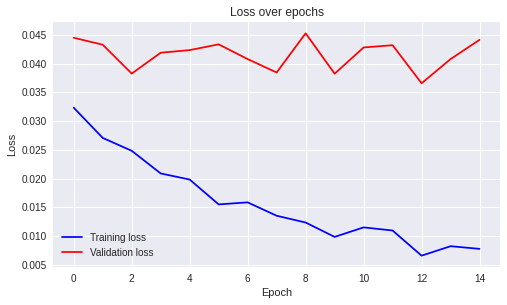

In [18]:
result=train_model(model,num_epochs,optimizer,criteration,train_loader,test_loader,DEVICE)

prediction= tensor(6)


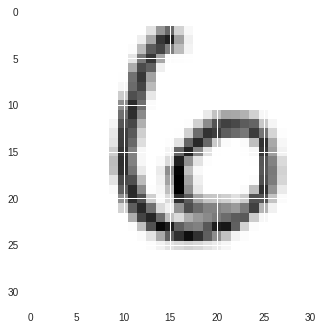

In [54]:
img_id=100

with torch.no_grad():
    model.eval()
    probs = model(test_set[img_id][0].unsqueeze(0))
    plt.imshow(test_set[img_id][0].squeeze(0),cmap='gray_r')
    print('prediction=',torch.argmax(probs))